In [2]:
from google.colab import drive
mydrive = '/content/drive/'
drive.mount(mydrive)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import sys

In [0]:
#returns choosing how many main factors
def index_lst(lst, component=0, rate=0):
  #component: numbers of main factors
  #rate: rate of sum(main factors)/sum(all factors)
  #rate range suggest: (0.8,1)
  #if you choose rate parameter, return index = 0 or less than len(lst)
  if component and rate:
    print('Component and rate must choose only one!')
    sys.exit(0)
  if not component and not rate:
    print('Invalid parameter for numbers of components!')
    sys.exit(0)
  elif component:
    print('Choosing by component, components are %s......'%component)
    return component
  else:
    print('Choosing by rate, rate is %s ......'%rate)
    for i in range(1, len(lst)):
      if sum(lst[:i])/sum(lst) >= rate:
        return i
    return 0

# Origin data(image matrix)

In [5]:
mat = [[-1,-1,0,2,1],[2,0,0,-1,-1],[2,0,1,1,0]]
# simple transform of test data
Mat = np.array(mat, dtype='float64')
print('Before PCA transforMation, data is:\n', Mat)

Before PCA transforMation, data is:
 [[-1. -1.  0.  2.  1.]
 [ 2.  0.  0. -1. -1.]
 [ 2.  0.  1.  1.  0.]]


# Method 1: PCA by original algorithm(手刻)

In [6]:
print('\nMethod 1: PCA by original algorithm:')
p,n = np.shape(Mat) # shape of Mat 
t = np.mean(Mat, 0) # mean of each column
# substract the mean of each column
for i in range(p):
  for j in range(n):
    Mat[i,j] = float(Mat[i,j]-t[j])
# covariance Matrix
cov_Mat = np.dot(Mat.T, Mat)/(p-1)
  
# PCA by original algorithm
# eigvalues and eigenvectors of covariance Matrix with eigvalues descending
U,V = np.linalg.eigh(cov_Mat) 
# Rearrange the eigenvectors and eigenvalues
U = U[::-1]
for i in range(n):
  V[i,:] = V[i,:][::-1]

# choose eigenvalue by component or rate, not both of them euqal to 0
Index = index_lst(U, component=2)  # choose how many main factors
if Index:
  v = V[:,:Index]  # subset of Unitary matrix
else:  # improper rate choice may return Index=0
  print('Invalid rate choice.\nPlease adjust the rate.')
  print('Rate distribute follows:')
  print([sum(U[:i])/sum(U) for i in range(1, len(U)+1)])
  sys.exit(0)

# data transformation
T1 = np.dot(Mat, v)
# print the transformed data
print('We choose %d main factors.'%Index)
print('After PCA transformation, data becomes:\n',T1)




Method 1: PCA by original algorithm:
Choosing by component, components are 2......
We choose 2 main factors.
After PCA transformation, data becomes:
 [[ 2.6838453  -0.36098161]
 [-2.09303664 -0.78689112]
 [-0.59080867  1.14787272]]


# Method 2: PCA by using SVD

In [7]:
from numpy.linalg import svd

print('\nMethod 2: PCA by original algorithm using SVD:')
# u: Unitary matrix,  eigenvectors in columns 
# d: list of the singular values, sorted in descending order
u,d,v = svd(cov_Mat)
Index = index_lst(d, rate=0.95)  # choose how many main factors
T2 = np.dot(Mat, u[:,:Index])  # transformed data
print('We choose %d main factors.'%Index)
print('After PCA transformation, data becomes:\n',T2)


Method 2: PCA by original algorithm using SVD:
Choosing by rate, rate is 0.95 ......
We choose 2 main factors.
After PCA transformation, data becomes:
 [[ 2.6838453   0.36098161]
 [-2.09303664  0.78689112]
 [-0.59080867 -1.14787272]]


# Method 3: PCA by Scikit-learn library

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # n_components can be integer or float in (0,1)
pca.fit(mat)  # fit the model
print('\nMethod 3: PCA by Scikit-learn:')
print('After PCA transformation, data becomes:')
print(pca.fit_transform(mat))  # transformed data


Method 3: PCA by Scikit-learn:
After PCA transformation, data becomes:
[[ 2.6838453  -0.36098161]
 [-2.09303664 -0.78689112]
 [-0.59080867  1.14787272]]


# 非監督式學習
# http://yltang.net/tutorial/dsml/14/





In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

step1: normalize

In [0]:
cancer = load_breast_cancer()
scaler = StandardScaler()                   # Instantiate
scaler.fit(cancer.data)              # Fit: find stat. info.
X_scaled = scaler.transform(cancer.data)    # Transform: mean=0, variance=1

step2: apply PCA

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)          # Instantiate
pca.fit(X_scaled)                  # Fit: find principal components
X_pca = pca.transform(X_scaled)    # Transform: reduce dimensionality
print('before reduce:',X_scaled.shape)
print(X_scaled)
print('after reduce:',X_pca.shape)
print(X_pca)

before reduce: (569, 30)
[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
after reduce: (569, 2)
[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


In [12]:
!pip install mglearn

     |████████████████████████████████| 542kB 4.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=8d07ce060e152c280b1eb7afb6be472fa7983572a01d7ec8e610e58e9bb412ba
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Second principal component')

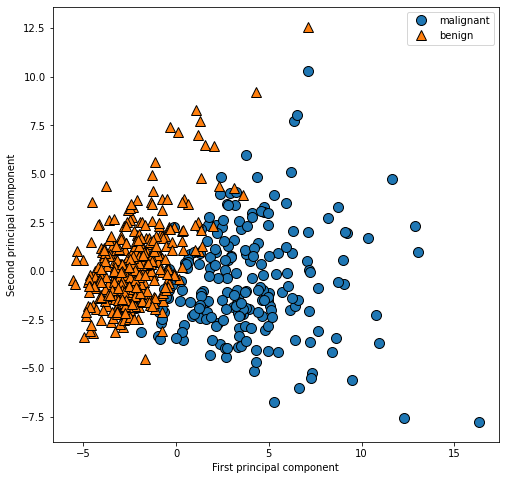

In [13]:
import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

# My dataset
note: load ALL to see classification

In [0]:
import cv2, glob, os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import mglearn


from sklearn import preprocessing

In [0]:
def pca_test(image, pca): 
  # split into 3 channels
  R_image = image[:,:,0]
  G_image = image[:,:,1]
  B_image = image[:,:,2]
  print(R_image)
  print(R_image.shape)
  R_image_scaled = preprocessing.scale(R_image)
  G_image_scaled = preprocessing.scale(G_image)
  B_image_scaled = preprocessing.scale(B_image)
  # applying PCA on each channel
 
  pca.fit(R_image_scaled)           
  R_pca_image = pca.transform(R_image_scaled)    

  pca.fit(G_image_scaled)           
  G_pca_image = pca.transform(G_image_scaled)  

  pca.fit(B_image_scaled)                
  B_pca_image = pca.transform(B_image_scaled)   
  print(R_pca_image)
  print(R_pca_image.shape)
  plt.scatter(R_pca_image[:, 0], R_pca_image[:, 1])
  plt.xlabel('component 1')
  plt.ylabel('component 2')
  plt.colorbar();

  plt.scatter(G_pca_image[:, 0], G_pca_image[:, 1])
  plt.xlabel('component 1')
  plt.ylabel('component 2')
  plt.colorbar();

  plt.scatter(B_pca_image[:, 0], B_pca_image[:, 1])
  plt.xlabel('component 1')
  plt.ylabel('component 2')
  plt.colorbar();
  plt.show()

(564, 564, 3)
(564, 564, 3)


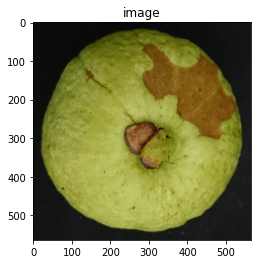

In [0]:
image = cv2.imread("/content/drive/My Drive/Project/1.jpg")
# image = cv2.imread("/content/drive/My Drive/Project/1.1_kmeans.jpg")
# image = cv2.imread("/content/drive/My Drive/Project/K_dataset/1.1_kmeans.jpg")
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)
plt.title('image')
plt.show()

[[11 12 11 ... 24 21 22]
 [11 12 11 ... 24 20 21]
 [12 12 11 ... 25 21 22]
 ...
 [23 22 22 ... 27 26 25]
 [24 23 22 ... 28 28 27]
 [23 23 23 ... 27 27 27]]
(564, 564)
[[27.33367671  6.29349122 -3.5497668 ]
 [27.02585339  6.3838713  -3.82293474]
 [27.13067786  6.30519985 -3.72622891]
 ...
 [15.17462389  4.80830499 -7.07784   ]
 [15.14714932  4.82415416 -6.85602639]
 [15.11489458  4.7428674  -6.98029383]]
(564, 3)


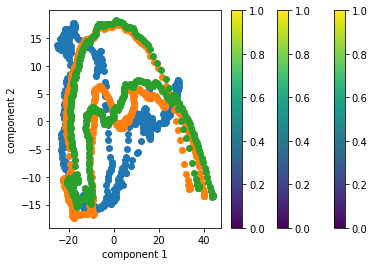

[[14 14 14 ... 14 14 14]
 [14 14 14 ... 14 14 14]
 [14 14 14 ... 14 14 14]
 ...
 [14 14 14 ... 14 14 14]
 [14 14 14 ... 14 14 14]
 [14 14 14 ... 14 14 14]]
(500, 500)
[[25.22192081  6.56718736 -0.71986778]
 [25.31863142  6.65224932 -0.7789332 ]
 [25.49442223  6.81430248 -0.88825871]
 ...
 [25.34629138  6.68498114 -0.8085413 ]
 [25.34629138  6.68498114 -0.8085413 ]
 [25.34629138  6.68498114 -0.8085413 ]]
(500, 3)


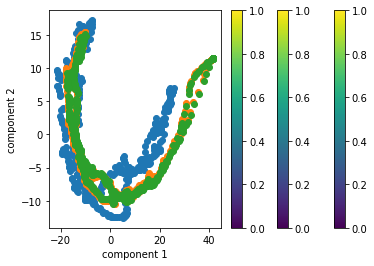

[[17 17 17 ... 22 22 22]
 [18 17 17 ... 23 22 22]
 [17 17 17 ... 24 22 22]
 ...
 [16 17 16 ... 15 15 15]
 [16 16 15 ... 14 14 16]
 [15 15 15 ... 13 14 15]]
(589, 589)
[[25.25899984 -3.00686183 -8.17800422]
 [25.19996207 -2.91882354 -8.25801944]
 [25.13278848 -2.80257814 -8.30133755]
 ...
 [32.20640649 -5.16919451 -6.92057413]
 [32.21619786 -5.2324998  -6.7141933 ]
 [32.18541641 -5.41618025 -6.69460545]]
(589, 3)


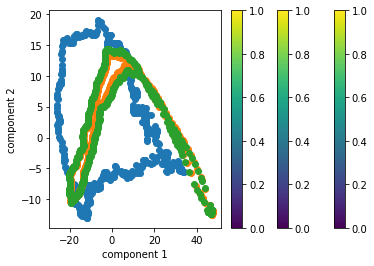

[[35 32 32 ... 30 29 28]
 [36 34 34 ... 29 29 29]
 [38 37 37 ... 29 30 30]
 ...
 [18 19 20 ... 26 28 31]
 [18 19 20 ... 24 26 31]
 [19 20 20 ... 23 24 31]]
(492, 492)
[[26.87780637 11.19135212  6.38997186]
 [26.83452913 11.15020486  6.53606378]
 [26.81465762 11.46772172  6.68160236]
 ...
 [32.79242645 -8.12455826  8.38555355]
 [32.75883025 -7.97674187  8.19236659]
 [32.63798479 -7.81414114  8.1396583 ]]
(492, 3)


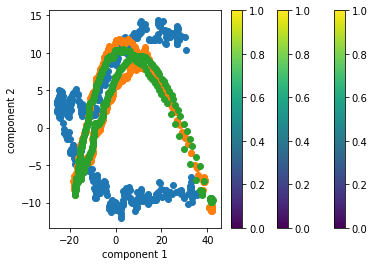

In [0]:
pca = PCA(n_components=3)  
image = cv2.imread("/content/drive/My Drive/Project/1.jpg")
pca_test(image, pca)
image = cv2.imread("/content/drive/My Drive/Project/1.1_kmeans.jpg")
pca_test(image, pca)
image = cv2.imread("/content/drive/My Drive/Project/3.jpg")
pca_test(image, pca)
image = cv2.imread("/content/drive/My Drive/Project/3.3.jpg")
pca_test(image, pca)

In [0]:
# pca_image  = np.dstack((R_pca_image,G_pca_image,B_pca_image))
# pca_image.shape

## Now get all images

In [15]:
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [0]:
def loading_data(path):
    print('Loading data...')
    imgs = []
    img_path = os.path.join(path , '*.jpg')
    imgs = imgs + [img_to_array(load_img(img)) for img in glob.glob(img_path)]
        # target_size remains same
          
    print('Total image number:' , len(imgs))
    print('Loading Done.')
    return imgs

In [30]:
# src_path = '/content/drive/My Drive/Project/0425guava-classified'
# src_path = '/content/drive/My Drive/Project/K_dataset'
src_path = '/content/drive/My Drive/Project/testing'

for subpath in os.listdir(src_path):
  data_path = os.path.join(src_path, subpath)
  images = loading_data(data_path)
  print(images[0].shape)
  images_std = []
  for image in images:
    images_std = images_std + [(image-np.mean(image)) / np.mean(image)]
  images_std = np.array(images_std)

Loading data...
Total image number: 70
Loading Done.
(677, 720, 3)


In [38]:
print(images_std.shape)
print(images_std[0].shape)
print(images_std[0].shape[2])
print(images_std[0][:,:,0])
print(images_std[0][:,:,1])
print(images_std[0][:,:,2])

(70,)
(677, 720, 3)
3
[[-0.63484806 -0.63484806 -0.63484806 ... -0.63484806 -0.63484806
  -0.63484806]
 [-0.63484806 -0.63484806 -0.63484806 ... -0.63484806 -0.63484806
  -0.63484806]
 [-0.63484806 -0.63484806 -0.63484806 ... -0.63484806 -0.63484806
  -0.63484806]
 ...
 [-0.63484806 -0.63484806 -0.63484806 ... -0.63484806 -0.63484806
  -0.63484806]
 [-0.63484806 -0.63484806 -0.63484806 ... -0.63484806 -0.63484806
  -0.63484806]
 [-0.63484806 -0.63484806 -0.63484806 ... -0.63484806 -0.63484806
  -0.63484806]]
[[-0.67542046 -0.67542046 -0.67542046 ... -0.67542046 -0.67542046
  -0.67542046]
 [-0.67542046 -0.67542046 -0.67542046 ... -0.67542046 -0.67542046
  -0.67542046]
 [-0.67542046 -0.67542046 -0.67542046 ... -0.67542046 -0.67542046
  -0.67542046]
 ...
 [-0.67542046 -0.67542046 -0.67542046 ... -0.67542046 -0.67542046
  -0.67542046]
 [-0.67542046 -0.67542046 -0.67542046 ... -0.67542046 -0.67542046
  -0.67542046]
 [-0.67542046 -0.67542046 -0.67542046 ... -0.67542046 -0.67542046
  -0.67542